<a href="https://colab.research.google.com/github/irfanc/TelcomProject/blob/master/Irfan_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
########################################### IMPORT ALL THE REQUIRED LIBRARIES ###########################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score,confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from xgboost import plot_importance
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPClassifier
from IPython.display import Audio
import scipy 
sound_file ="Neene Modalu.mp3"
import time

In [ ]:
# from google.colab import drive
# import os
# drive.mount('/gdrive')
# # %cd /gdrive
# print( os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/content


In [ ]:
col = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land", "wrong_fragment","urgent","hot","num_failed_logins","logged_in", "num_compromised","root_shell","su_attempted","num_root","num_file_creations", "num_shells","num_access_files","num_outbound_cmds","is_host_login", "is_guest_login","_count","srv_count","serror_rate", "srv_serror_rate", "rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate", "srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate", "dst_host_diff_srv_rate","dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate", "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]
df = pd.read_csv("Train.txt",names = col)
df_test = pd.read_csv("Test.txt",names = col)

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## *Check for Missing Values*

In [ ]:
def plt_missing_value_percentage(DF , title):
    plt.figure ( figsize = (15,5))
    print(DF.isnull().sum()*100/len(DF))
    ax = sns.heatmap(data = DF.isna() ,cbar= False, cmap = 'BuPu_r', yticklabels = False)
    ax.set_title(title)
    plt.show()



duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
_count                         0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

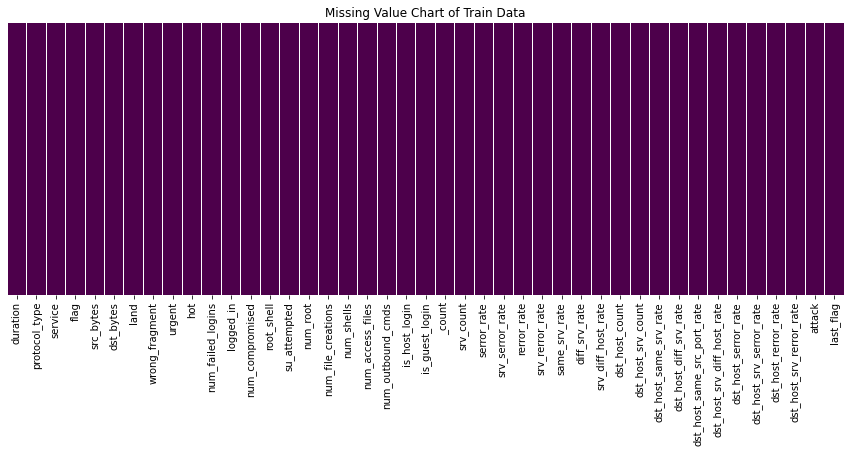

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
_count                         0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

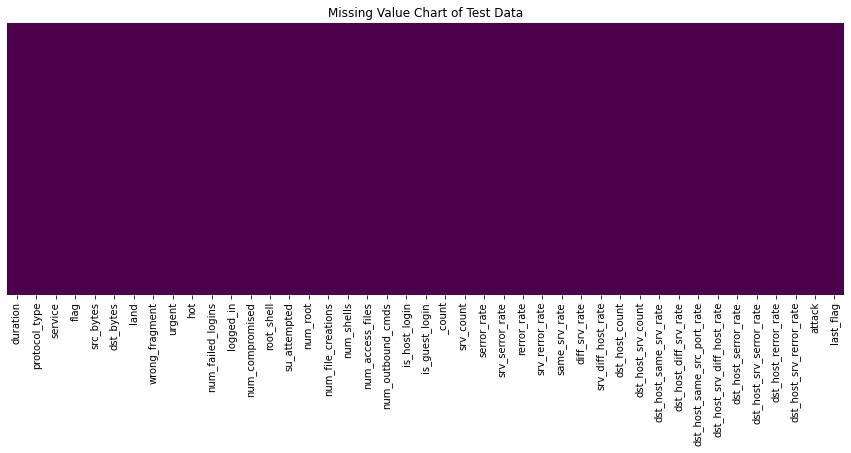

In [ ]:
plt_missing_value_percentage(df, "Missing Value Chart of Train Data")

plt_missing_value_percentage(df_test,"Missing Value Chart of Test Data")



## *Attack Class Density*

In [ ]:
def check_attack_class_density(df):
  fig, ax = plt.subplots(2,1,figsize = (20,20))
  fig.suptitle('Target Class distribution', fontsize=50) # Add the text/suptitle to figure

  attack_df = df["attack"].value_counts()[1:]
  l = []
  for x in attack_df :
    if ( x < 10) :
      l.append(0.5)
    elif ( x < 10) :
      l.append(0.4)
    elif ( x < 50) :
      l.append(0.3)
    elif ( x < 1000) :
      l.append(0.1)
    else:
      l.append(0)
  explode =  tuple(l)


  # frrequency graph of 'attack'
  sns.countplot('attack', data = df, order= attack_df.index, ax = ax[0])
  ax[0].set_ylabel('# of Attacks', fontsize=18)
  ax[0].set_xlabel('Type of Attacks', fontsize=18)
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=90, fontsize=18)
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=16)
  def autoLabel(ax):
      for rect in ax.patches:
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width()/2., 1.005*height, str(height),
                  fontsize=16, ha='center', va='bottom')
  # autoLabel( ax[0])


  # pie chart of 'attack'
  attack_df.plot.pie(ax = ax[1], autopct='%1.2f%%', explode = explode, shadow = True, startangle = 45, textprops={'fontsize': 18})
  ax[1].set_aspect(aspect = 'auto')
  plt.tight_layout()
  plt.show()

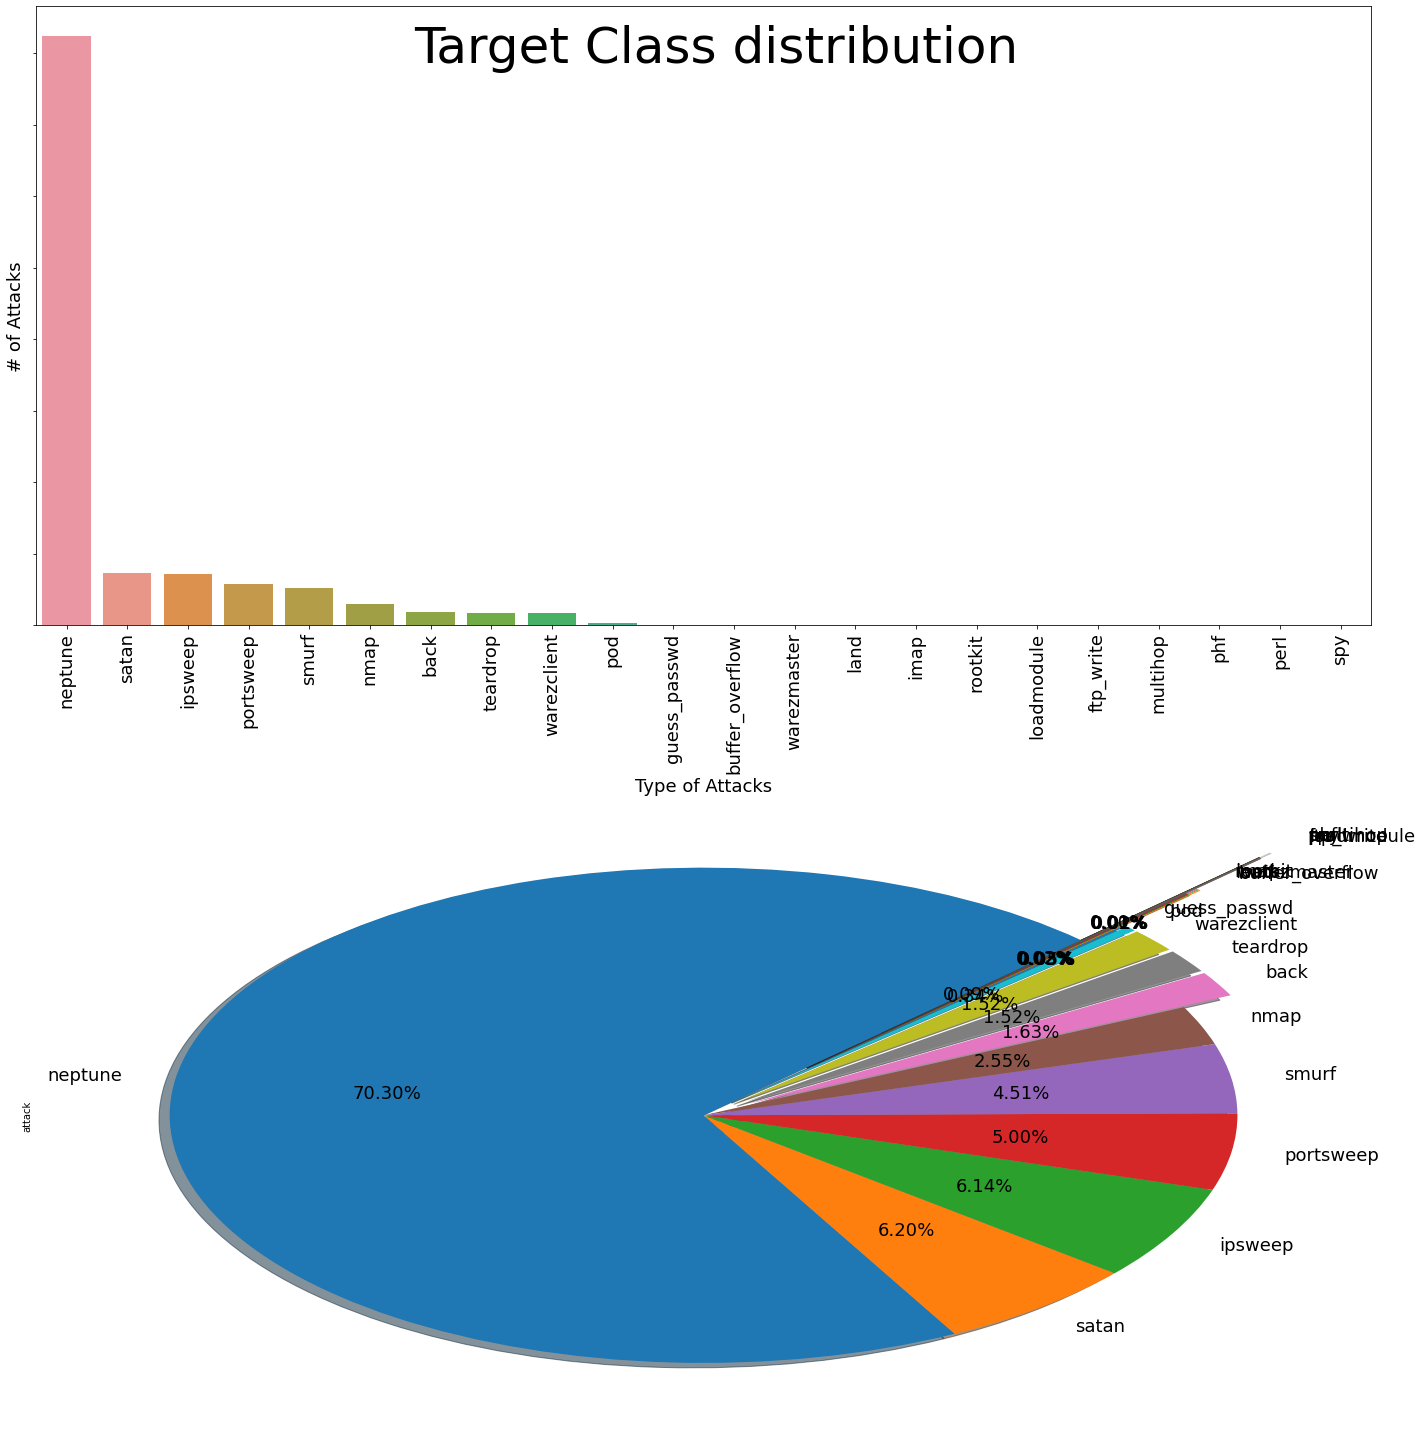

In [ ]:
# Check Attack Class Density in Train data
check_attack_class_density(df)

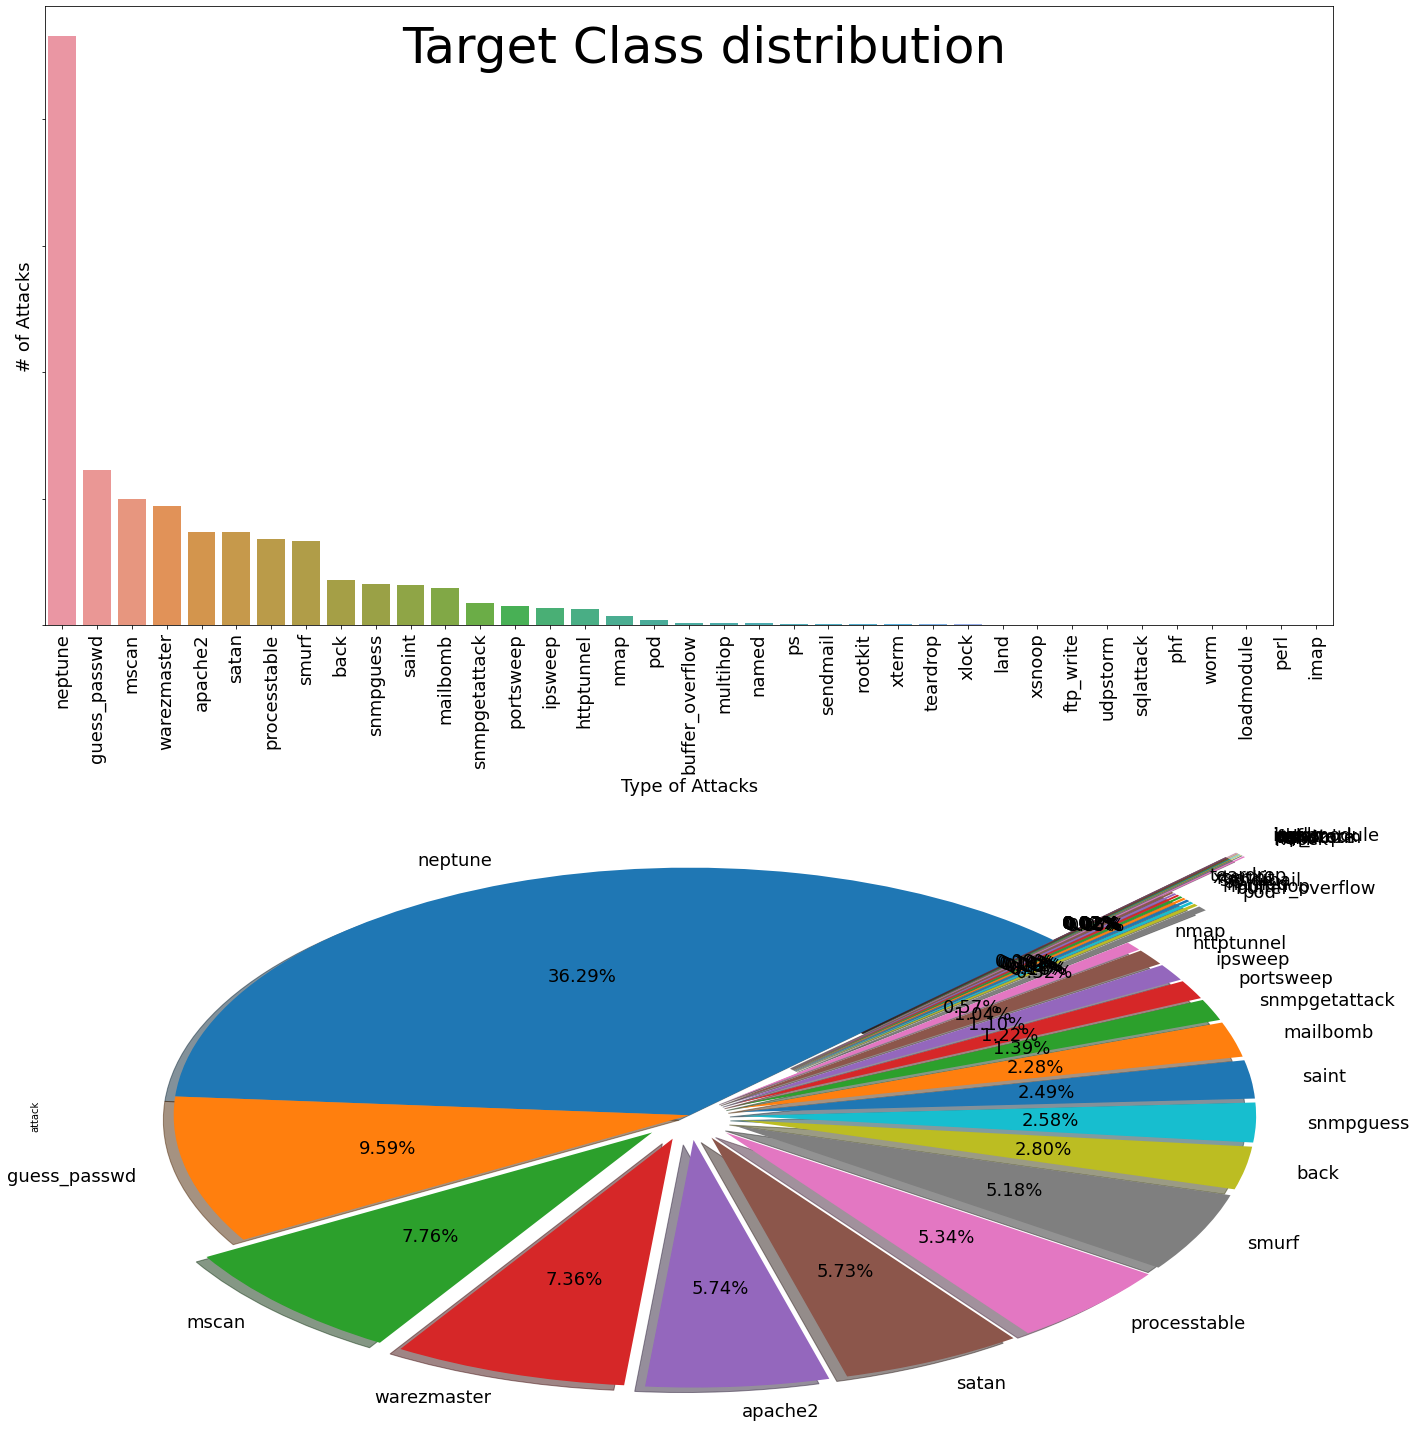

In [ ]:
# Check Attack Class Density in Test data
check_attack_class_density(df_test)

## *Drop unwanted columns*

In [ ]:
def drop_cols_with_equal_min_max(DF) :
  df_t = DF.describe().T
  drop_cols = df_t[df_t['min'] == df_t['max']].index.to_list()
  print('No. of colums with all value to be same - {} , {} '.format( len(drop_cols), str(drop_cols) )   )
  if (len(drop_cols) is not 0) :
    DF.drop(columns = drop_cols, inplace = True ) 


In [ ]:
drop_cols_with_equal_min_max(df)
drop_cols_with_equal_min_max(df_test)


No. of colums with all value to be same - 1 , ['num_outbound_cmds'] 
No. of colums with all value to be same - 1 , ['num_outbound_cmds'] 


In [ ]:
target_cols = 'attack'
feature_cols = df.drop(columns = target_cols).columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

## Check and Remove correlation b/w Columns

### Checking the co-relation between the Xs

In [ ]:
# Checking the co-relation between the Xs
def plot_correlated_cols(DF) :
  fig, ax = plt.subplots (1,1, figsize = (30,30) )
  fig.suptitle('Correlation Matrix', fontsize=50) # Add the text/suptitle to figure
  sns.heatmap( DF, annot=True ,  cmap = 'YlGnBu',  fmt='.2g', square= True )
  plt.show()

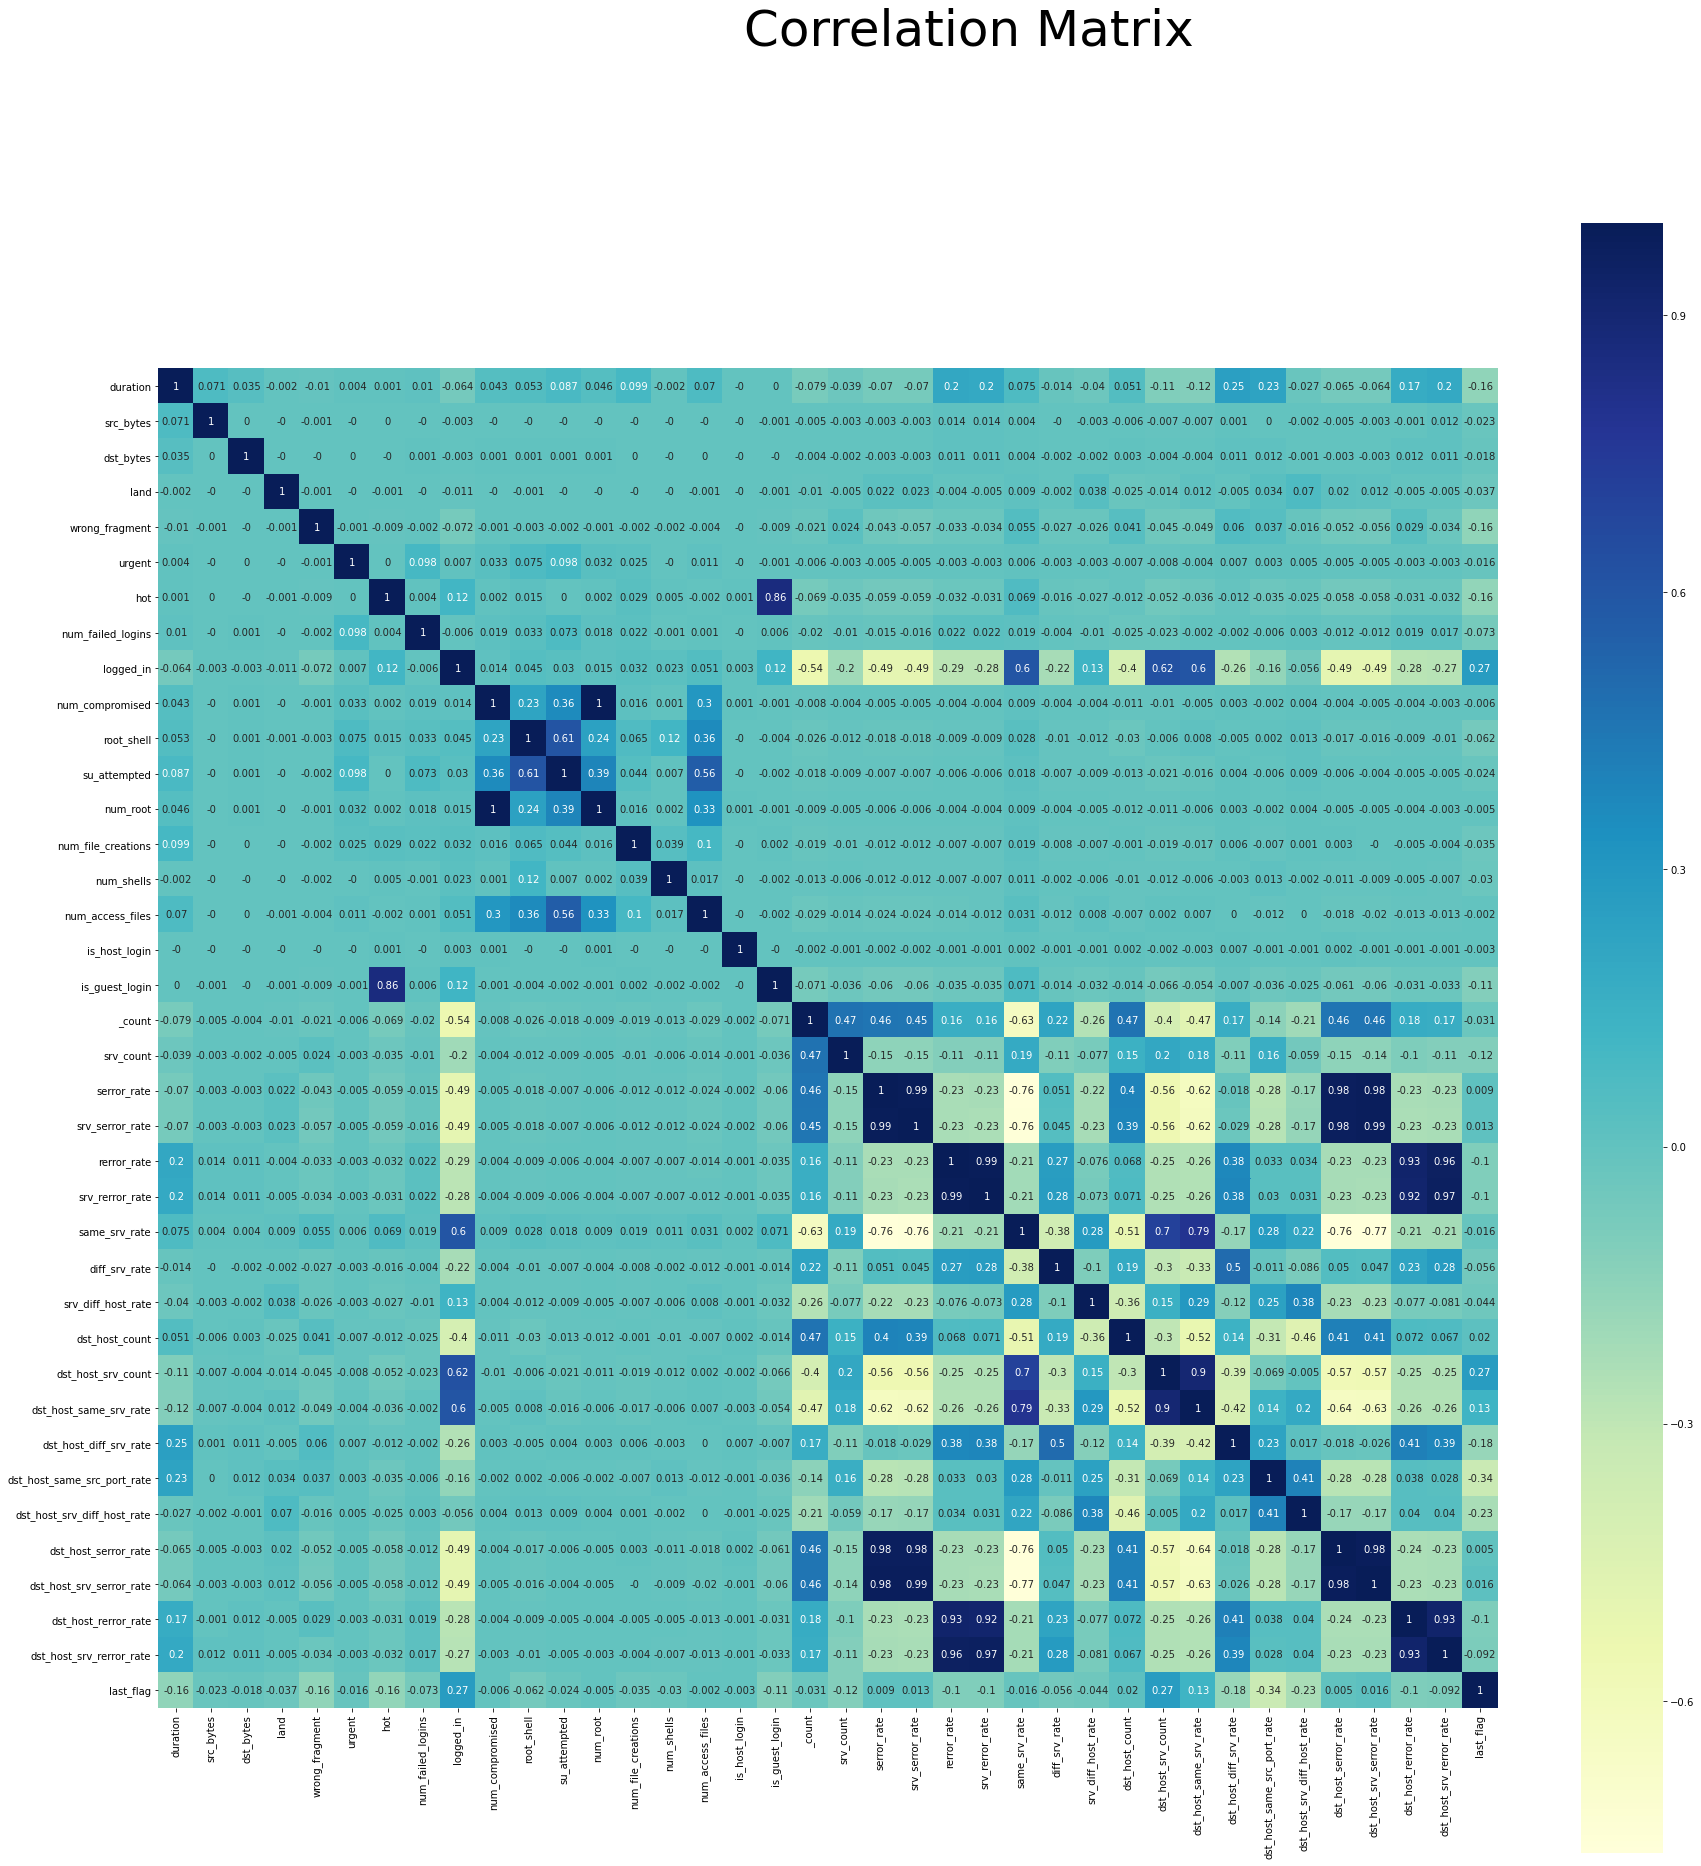

In [ ]:
plot_correlated_cols(round( df.corr() , 3 ))


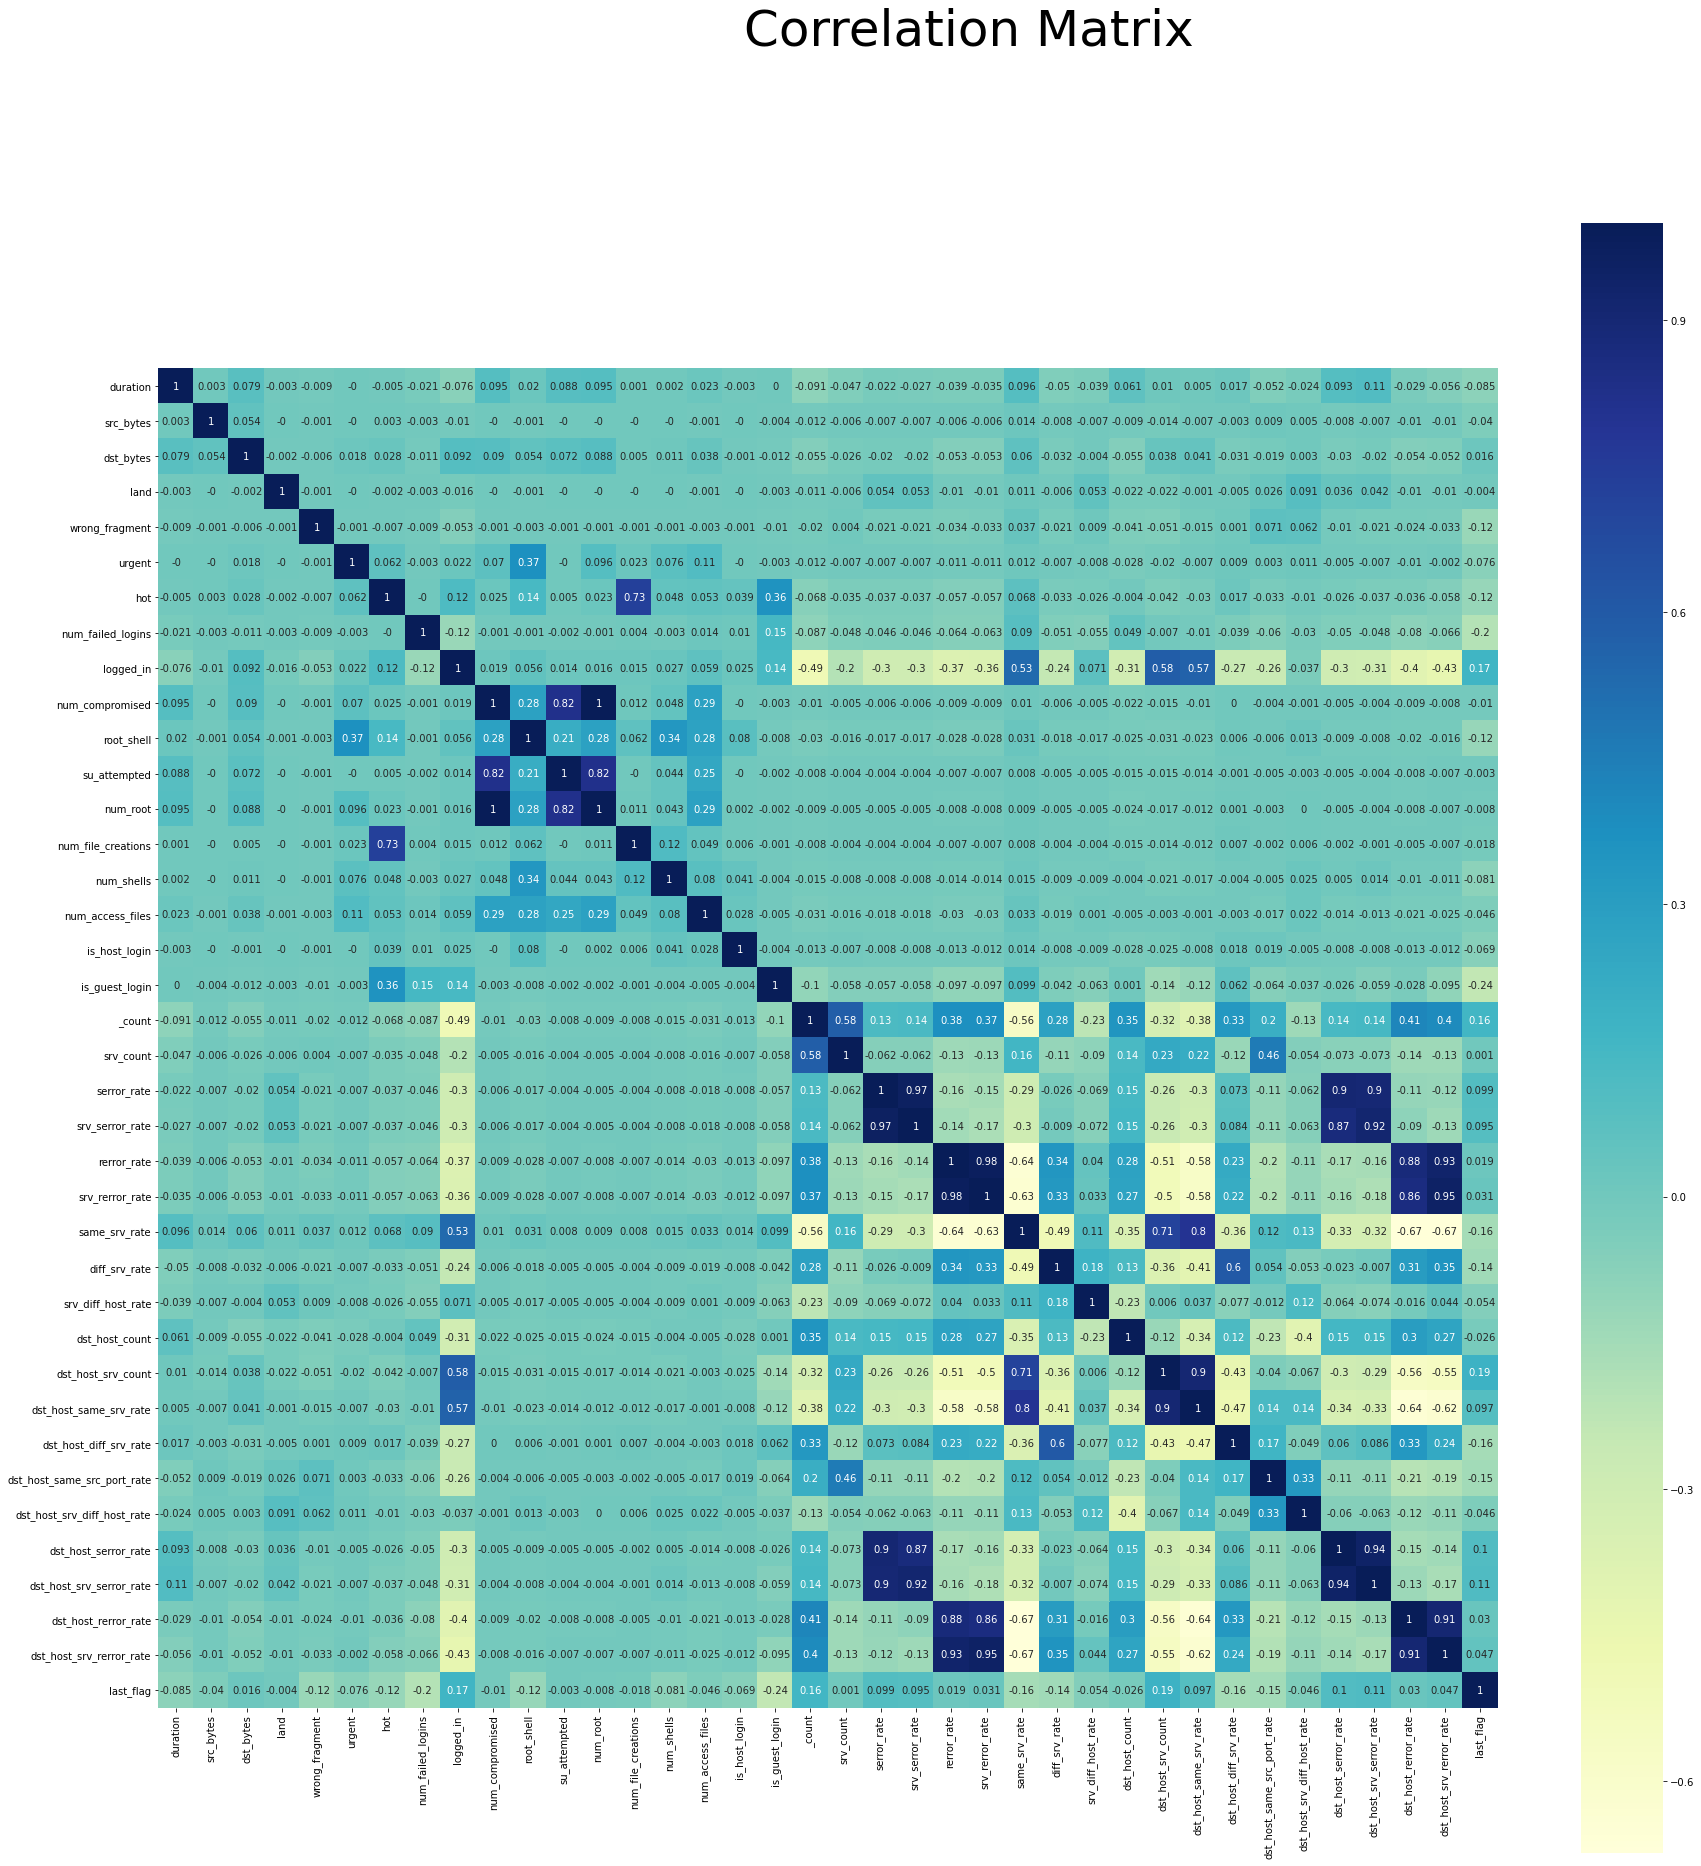

In [ ]:
plot_correlated_cols(round( df_test.corr() , 3 ))


#### Visualize co-related feature with relation > 0.7


In [ ]:
# returns correlated Matrix, with 1 representing corelation and 0- indicated no corelation, 
# criteria of corelation is threshold_value of corelation, is corelation value > threshold_value then cols are said to be corelated 
def corelated_feature_matrix(DF, threshold_value=0.7) :
  corr = round( DF.corr() , 3 )
  corr1 = np.where(( abs(corr)  > threshold_value), 1, 0)
  df_corr =  pd.DataFrame( corr1, columns = corr.columns, index = corr.columns)
  return df_corr


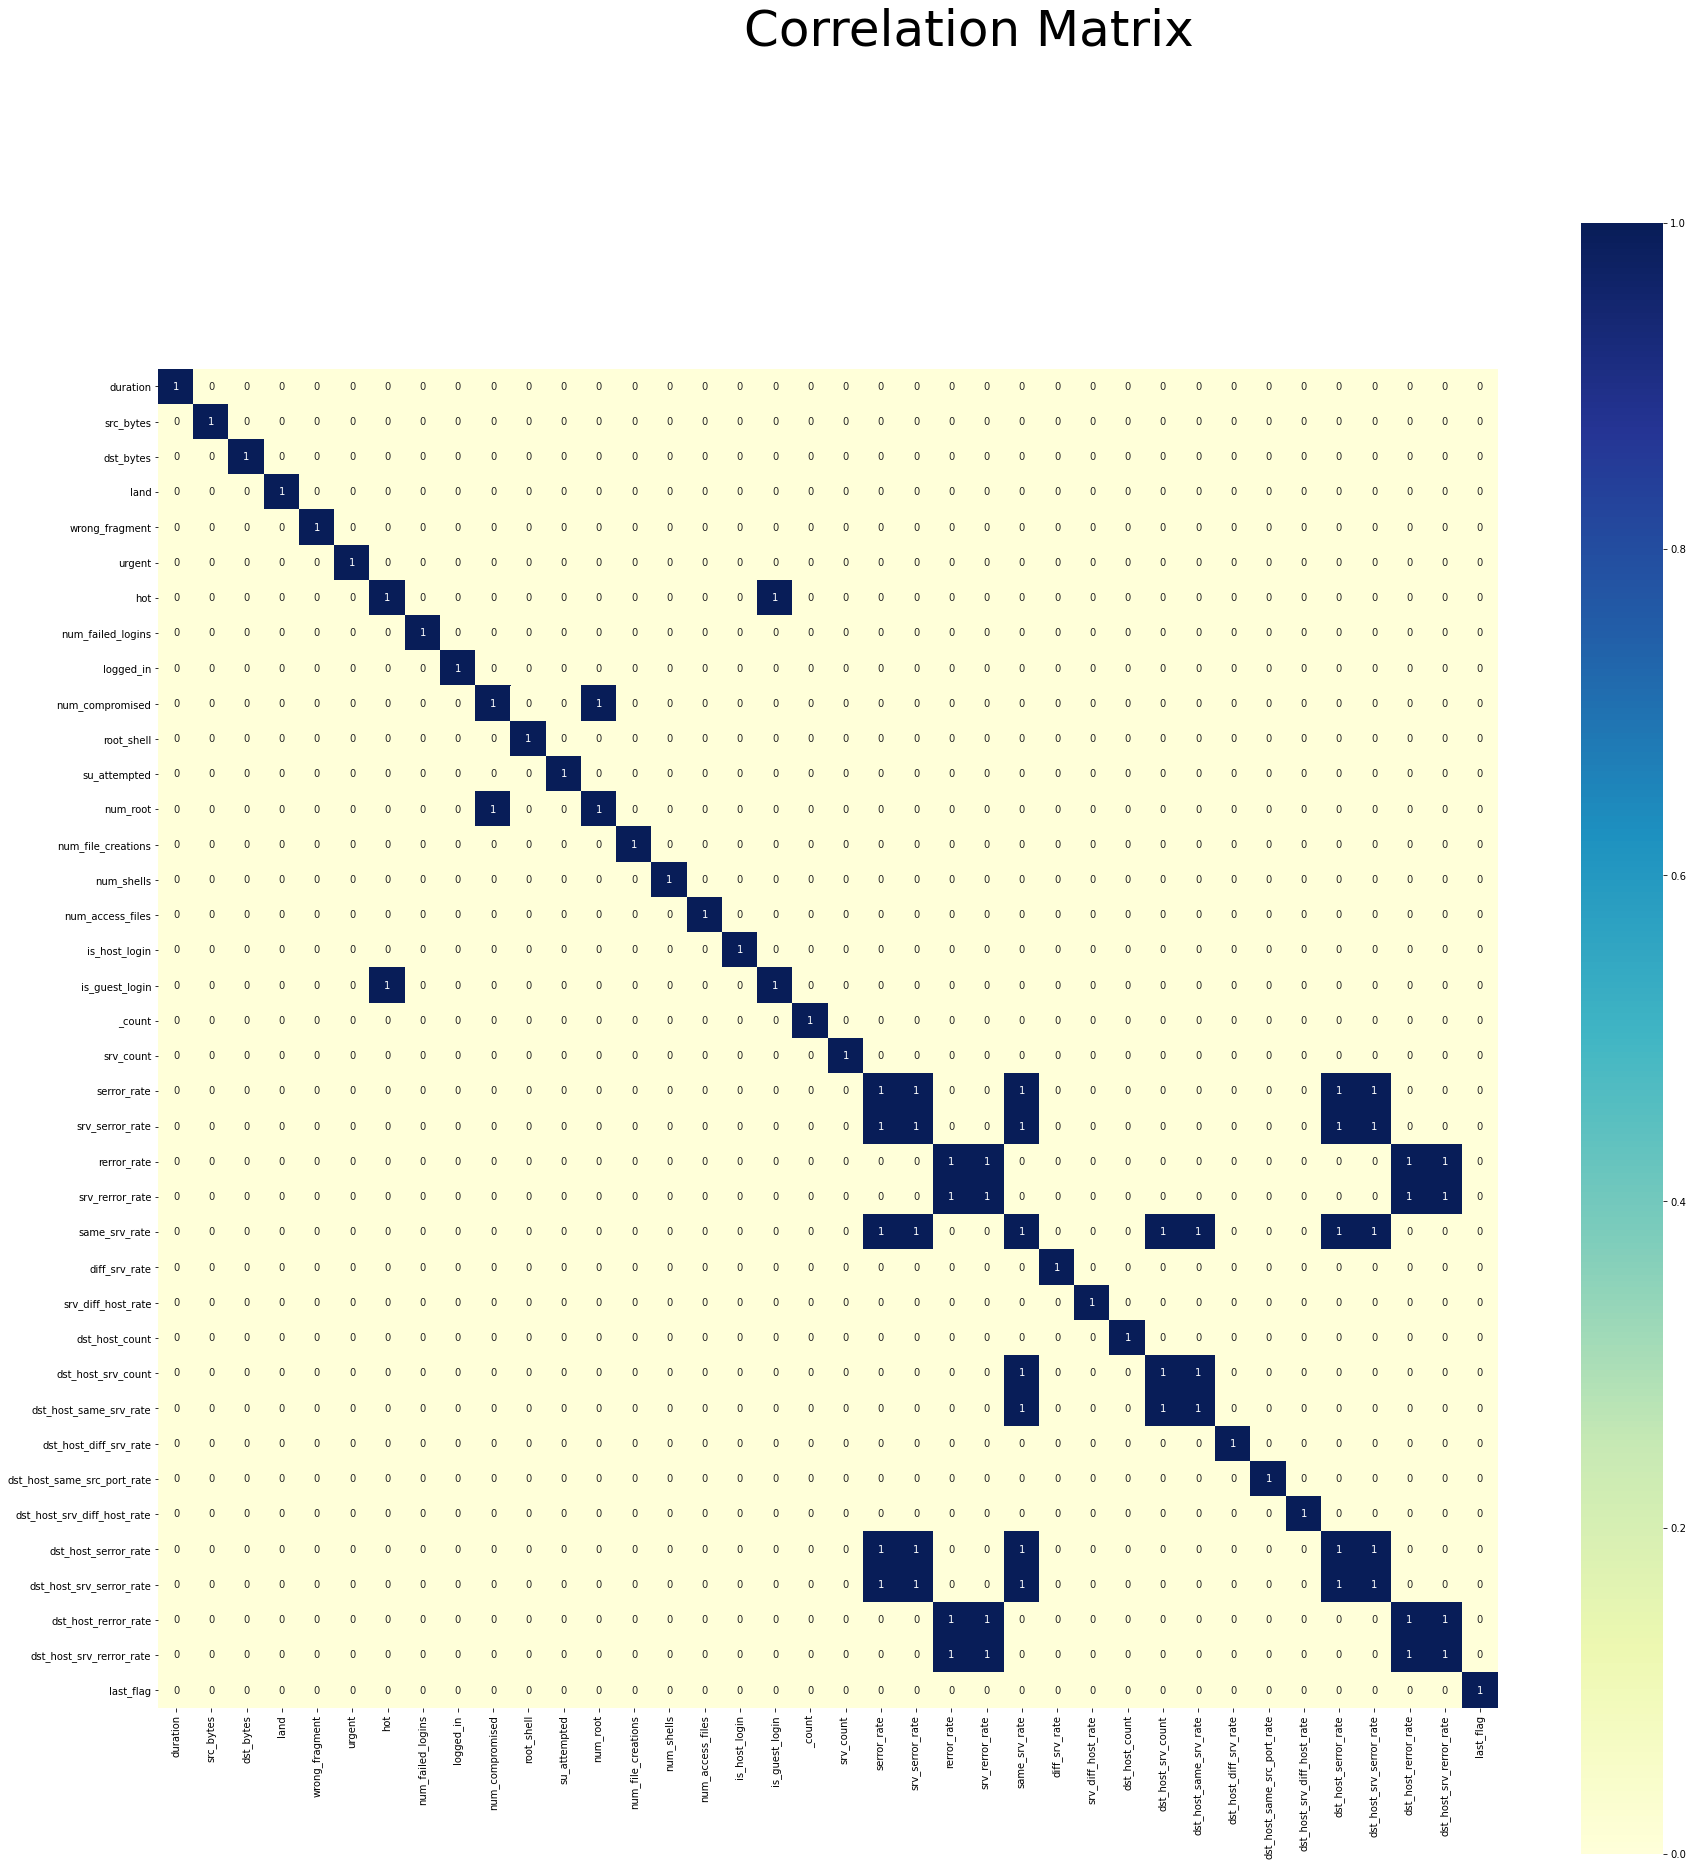

In [ ]:
df_corr = corelated_feature_matrix(df, threshold_value=0.7) 
plot_correlated_cols(df_corr)

#### Compute list of co-related columns to be dropped

In [ ]:
# returns list of corelated columns which we can drop
# input is correlated matrix
def compute_corelated_cols(DF):
  dict = {}
  # iterate over all the columns to find out others which are correlated > 0.7,  as per corrlation matrix
  for c in DF.columns:
      l = DF.index[df_corr[c] == 1].tolist()
      l.remove(c)  #  remove slef column from the list
  #     print(l)
      if len(l) :
          dict[c] = set(l)

  drop_set = set()
  for e in dict:
  #     print(e , dict[e] , drop_set)
      if e not in drop_set :  
          drop_set = drop_set.union(dict[e])

  print("No. of corelated columns needs to be dropped  are  {}\n{}".format(len(drop_set), str(drop_set)))
  return drop_set

In [ ]:
# computing list of columns which needs to be dropped
drop_cols = compute_corelated_cols(df_corr)

# Drop columns from Train and Test DataSet
df.drop( columns= drop_cols , inplace = True)
df_test.drop( columns= drop_cols , inplace = True)

No. of corelated columns needs to be dropped  are  10
{'dst_host_same_srv_rate', 'dst_host_rerror_rate', 'dst_host_srv_serror_rate', 'same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_rerror_rate', 'is_guest_login', 'num_root', 'srv_rerror_rate', 'srv_serror_rate'}


#### dropping of columns

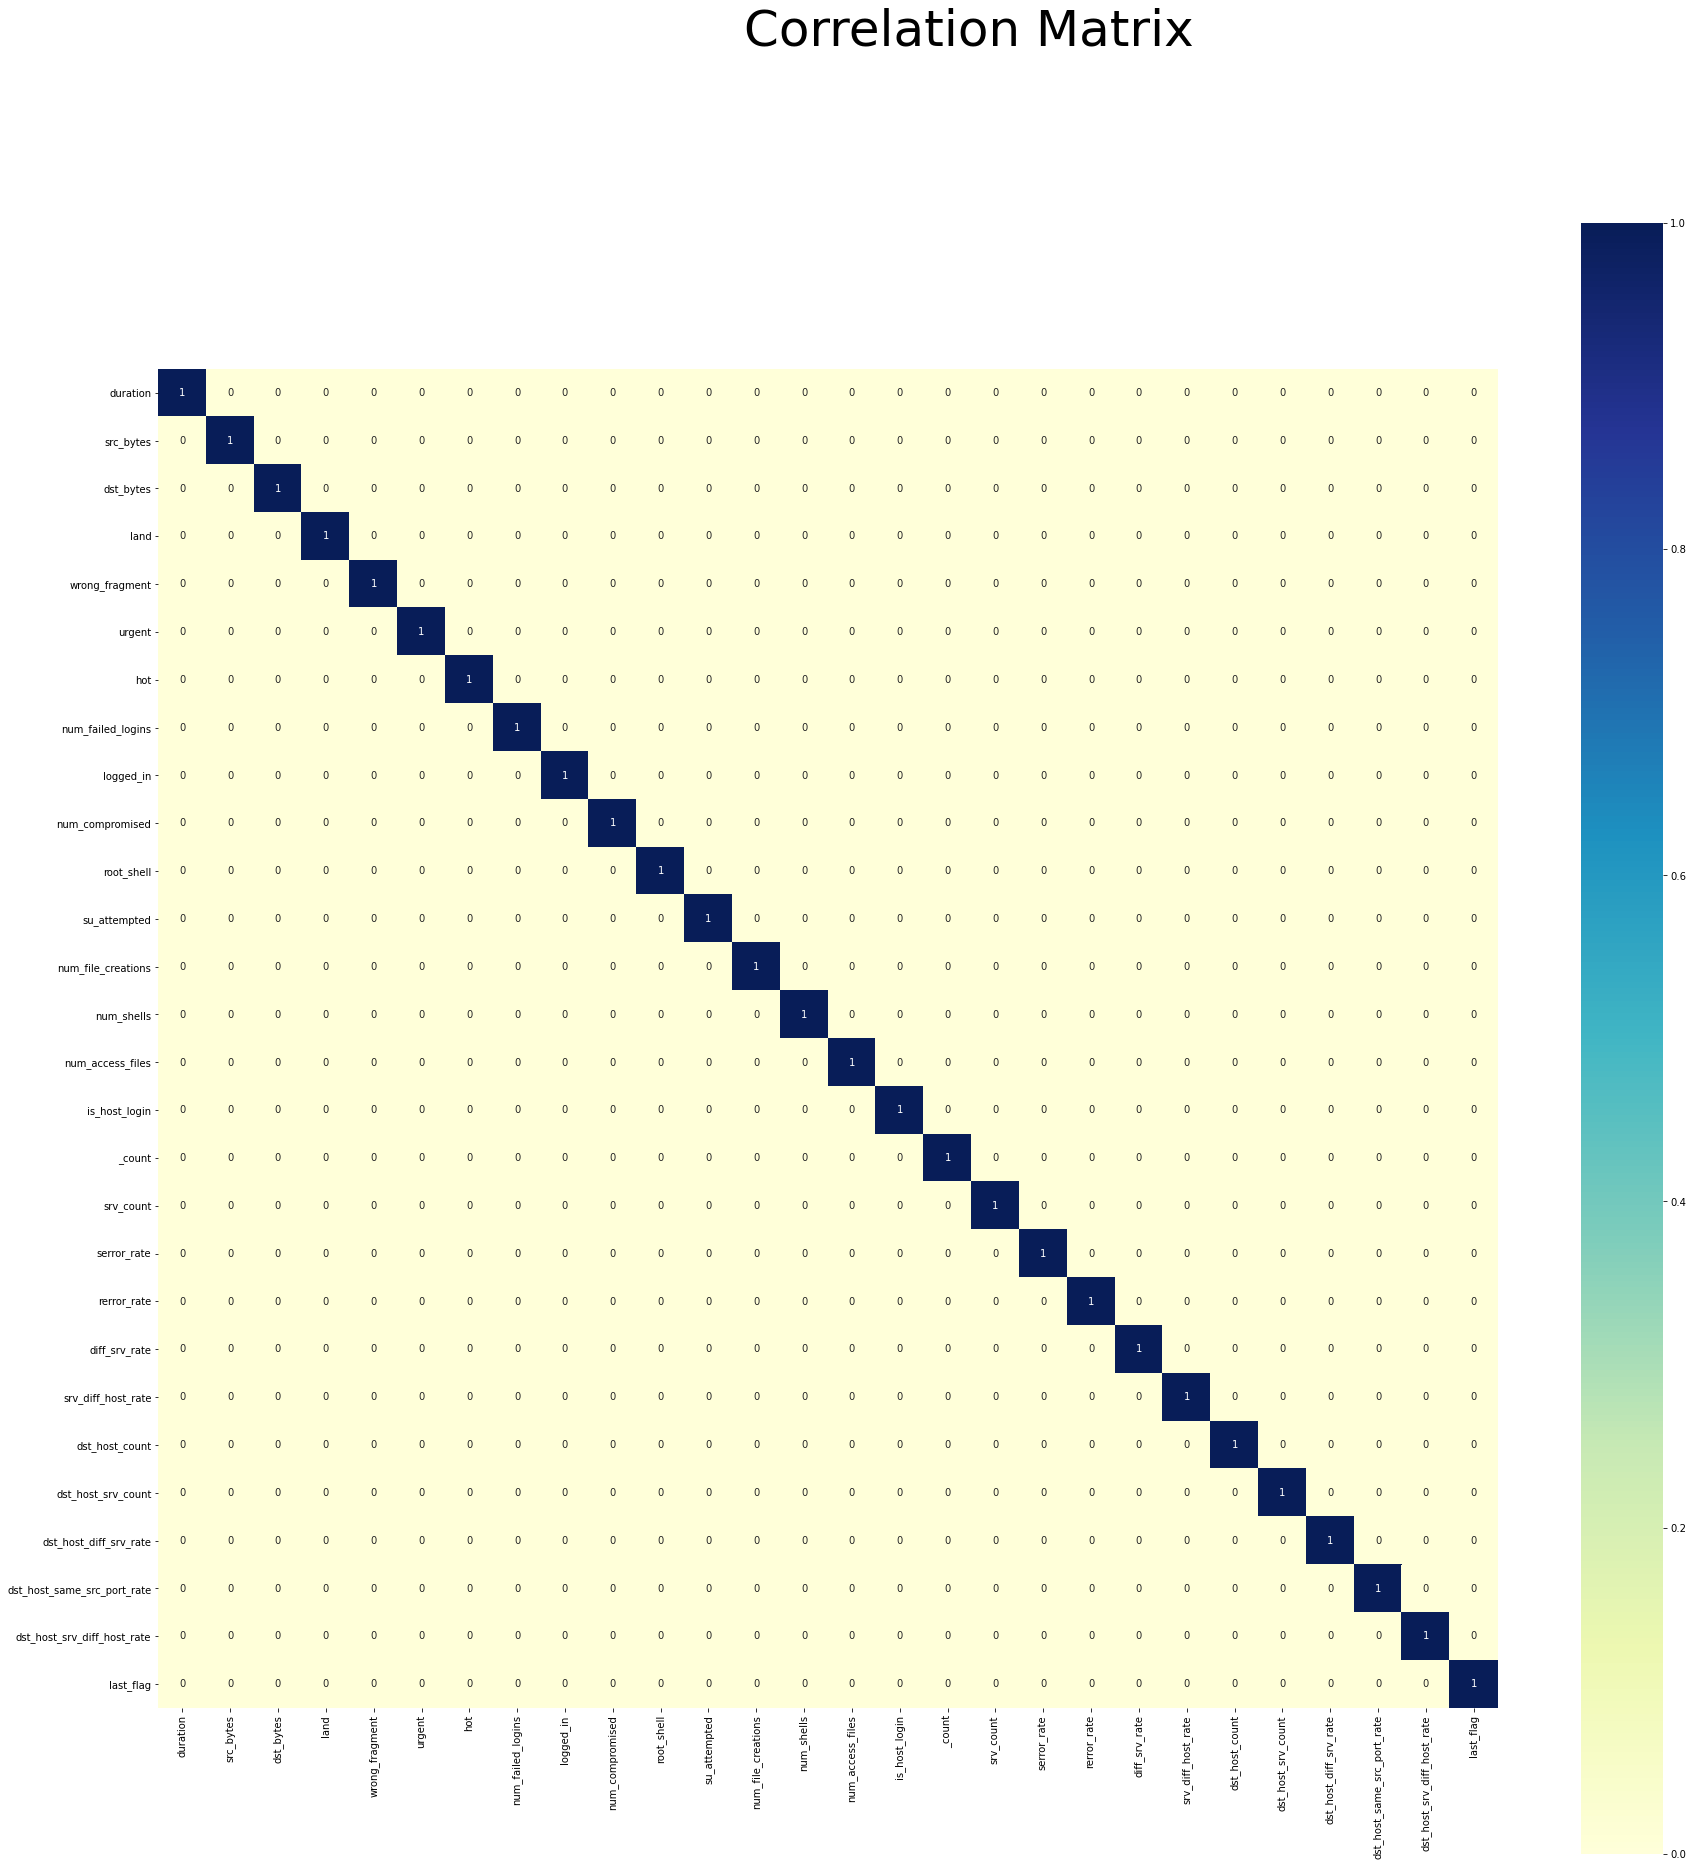

In [ ]:
df_corr = corelated_feature_matrix(df, threshold_value=0.7) 
plot_correlated_cols(df_corr)

## *Encode the Data*
######  refer :: https://pbpython.com/categorical-encoding.html

In [ ]:
df_train = df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### encoding binary columns

In [ ]:
# encoding binary columns
def encoding_binary_cols(DF, binary_cols):
  DF[binary_cols] = DF[binary_cols].astype('bool')

binary_cols = ['land', 'logged_in', 'root_shell', 'is_host_login', 'su_attempted']
encoding_binary_cols(df, binary_cols)
encoding_binary_cols(df_test, binary_cols)

# df_train[binary_cols].info()

### encoding categorical columns

In [ ]:
# encoding categorical columns
def encoding_categorical_cols(DF , categorical_cols):
  from sklearn.preprocessing import LabelEncoder

  lb_make = LabelEncoder()

  for c in categorical_cols :
      DF[c] = lb_make.fit_transform(DF[c])

categorical_cols = ['protocol_type', 'service', 'flag']
encoding_categorical_cols(df, categorical_cols)
encoding_categorical_cols(df_test, categorical_cols)

### encoding 'attack' columns

In [ ]:

#  encode 'normal' attack as 0 , i.e Fasle  and othere attacks as True attack
def encoding_target_cols(DF , target_cols):
    DF[target_cols+'_code'] = np.where(DF[target_cols].str.contains("normal"), False, True)
    DF[target_cols]      = DF[target_cols].astype('category')
    DF[target_cols+'_type'] = DF[target_cols].cat.codes

target_cols = 'attack'
encoding_target_cols(df_train , target_cols)
encoding_target_cols(df_test , target_cols)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     22544 non-null  int64   
 1   protocol_type                22544 non-null  int32   
 2   service                      22544 non-null  int32   
 3   flag                         22544 non-null  int32   
 4   src_bytes                    22544 non-null  int64   
 5   dst_bytes                    22544 non-null  int64   
 6   land                         22544 non-null  bool    
 7   wrong_fragment               22544 non-null  int64   
 8   urgent                       22544 non-null  int64   
 9   hot                          22544 non-null  int64   
 10  num_failed_logins            22544 non-null  int64   
 11  logged_in                    22544 non-null  bool    
 12  num_compromised              22544 non-null  int64   
 13  r

## *Dimensionality reduction*

### Feature Selection - by Random Forest

In [ ]:
target_cols = ['attack', 'attack_code'  , 'attack_type']
feature_cols = df.drop(columns = target_cols).columns
len(df_train.columns)

34

In [ ]:

def plot_important_cols(DF, col , imp, min_importance_value = 0.02):
  fig = plt.figure(figsize = (20,10))
  fig.suptitle(' Feature Importance Chart', fontsize=50) # Add the text/suptitle to figure

  ax = sns.barplot(col , imp )
  ax.set_xlabel(" Columns ", fontsize=18)
  ax.set_ylabel(" Columns relative importance", fontsize=20)
  ax.set_xticklabels(col, rotation=90, fontsize=20)

  ax.grid(b=True, which='both', color='b', linestyle='-')
  ax.grid(b=True, which='minor', color='r', linestyle=':')
  ax.minorticks_on()
  ax.set_axisbelow(True)

  ax.axhline(min_importance_value, color = 'red')
  ax.text(-3, min_importance_value + 0.01, "Minimum threshold importance value\n for feature selection ",color = 'red', fontsize=20)
  plt.show()
  
# feature selection by Random Forest
def compute_important_cols(DF, min_importance_value = 0.02, plot = False):
  X =  DF[feature_cols]
  Y =  DF['attack_code']
  model = RandomForestClassifier(random_state=123, max_depth=20)
  model.fit(X,Y)
  imp = model.feature_importances_ 

  imp_features = []
  for i, f in zip(imp, feature_cols):
      if i > min_importance_value :
          imp_features.append(f)
  print ("Out of {} features based on relative importance = {} selecting {} features".format (len(feature_cols), min_importance_value,  len (imp_features)))
  if( plot ):
    plot_important_cols(DF, X.columns , imp)
  return imp_features




imp_cols = compute_important_cols(df_train, min_importance_value = 0.02, plot=False)

Out of 31 features based on relative importance = 0.02 selecting 13 features


## Plot KDE plots for all features - ?????

In [ ]:
imp_cols

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 '_count',
 'serror_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'last_flag']

In [ ]:
df[imp_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                125973 non-null  int32  
 1   service                      125973 non-null  int32  
 2   flag                         125973 non-null  int32  
 3   src_bytes                    125973 non-null  int64  
 4   dst_bytes                    125973 non-null  int64  
 5   logged_in                    125973 non-null  bool   
 6   _count                       125973 non-null  int64  
 7   serror_rate                  125973 non-null  float64
 8   diff_srv_rate                125973 non-null  float64
 9   dst_host_srv_count           125973 non-null  int64  
 10  dst_host_diff_srv_rate       125973 non-null  float64
 11  dst_host_same_src_port_rate  125973 non-null  float64
 12  last_flag                    125973 non-null  int64  
dtyp

### Normalize the test and train data

In [ ]:
from sklearn import preprocessing

def scaleData(DF):
    scl  = preprocessing.MinMaxScaler(feature_range=(0,1))
    arr_scld = scl.fit_transform(DF)
    d_scld = pd.DataFrame(arr_scld)
    d_scld.columns = DF.columns
#     print(d_scld.describe())
    return d_scld

In [ ]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,attack,last_flag,attack_code,attack_type
0,0,1,45,1,0,0,False,0,0,0,...,0.00,255,10,0.06,0.00,0.00,neptune,21,True,14
1,0,1,45,1,0,0,False,0,0,0,...,0.00,255,1,0.06,0.00,0.00,neptune,21,True,14
2,2,1,19,9,12983,0,False,0,0,0,...,0.00,134,86,0.04,0.61,0.02,normal,21,False,16
3,0,0,13,9,20,0,False,0,0,0,...,1.00,3,57,0.00,1.00,0.28,saint,15,True,24
4,1,1,55,2,0,15,False,0,0,0,...,0.75,29,86,0.17,0.03,0.02,mscan,11,True,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,False,0,0,0,...,0.00,100,141,0.06,0.01,0.01,normal,21,False,16
22540,0,1,22,9,317,938,False,0,0,0,...,0.18,197,255,0.00,0.01,0.01,normal,21,False,16
22541,0,1,22,9,54540,8314,False,0,0,2,...,0.20,255,255,0.00,0.00,0.00,back,15,True,1
22542,0,2,11,9,42,42,False,0,0,0,...,0.33,255,252,0.01,0.00,0.00,normal,21,False,16


In [ ]:
# feature_cols = df_train.drop(columns = ['attack', 'attack_code', 'attack_type']).columns
df_train_scaled = scaleData( df_train[feature_cols])
df_test_scaled  = scaleData( df_test[feature_cols])


In [ ]:
df_train_scaled.info()
imp_cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  float64
 2   service                      125973 non-null  float64
 3   flag                         125973 non-null  float64
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  float64
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  float64
 12  num_compromised              125973 non-null  float64
 13 

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'logged_in',
 '_count',
 'serror_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'last_flag']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( df_train_scaled[imp_cols], df_train['attack_code'], test_size=0.30, random_state=42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((88181, 13), (37792, 13), (88181,), (37792,))

In [ ]:
# Function to evaluate each model 
def run_models(spread,X_train, Y_train, X_validation, Y_validation,seed):
    #Select and Add the Models
    models = []
#     models.append(('XGBoo ', XGBClassifier()))
#     models.append(('AdaBoo', AdaBoostClassifier(n_estimators=100, random_state=seed)))
    models.append(('LogReg', LogisticRegression(solver='liblinear', multi_class='ovr')))
    models.append(('LDA   ', LinearDiscriminantAnalysis()))
    models.append(('KNearN', KNeighborsClassifier()))
    models.append(('CART  ', DecisionTreeClassifier()))
    models.append(('NaiveB', GaussianNB()))
#     models.append(('SupVec', SVC(gamma='auto', probability=True)))
    models.append(('RandFo', RandomForestClassifier(n_estimators=100)))
    
    Res_final =[]
    for r in spread: # Select the Category of the Data Seperately
        results = []
        names = []
        F1_Scores =[]
        Auc_Scores =[]
        Train_Scores =[]
        Test_Scores =[]
        Precision_Scores_0=[]
        Precision_Scores_1=[]
        Recall_Scores_1 =[]
        Recall_Scores_0 =[]
        Ex_times =[]
        print("=========================================================")
        print("Scores for "+str(r)+" Variables: ")
        print("=========================================================")
        q = spread[r]
        X_train1 = X_train.iloc[:,q[0]:q[-1]]
        X_validation1 = X_validation.iloc[:,q[0]:q[-1]]
        Y_train1 = Y_train
        Y_validation1 = Y_validation
        for name, model in models: # Run The Models with Selected Data Category
            print("------{} running --------------------------".format(name))
            start_time=time.time()
            m = model
            m.fit(X_train1, Y_train1)
            kfold = KFold(n_splits=10, random_state=seed)
            cv_results = model_selection.cross_val_score(model, X_train1, Y_train1, cv=kfold, scoring="accuracy")
            Trn_scr = np.round((cv_results)*100,2)

            #Trn_scr = np.round((m.score(X_train1, Y_train1)*100),2)
            #msg = "Train Score for :"+"%s: %.2f " % (name,Trn_scr)
            #print(msg)
            Train_Scores.append(Trn_scr)

            predictions = m.predict(X_validation1)
            Tst_scr = np.round((accuracy_score(Y_validation1, predictions)*100),2)
            
            #msg = "Test Score for  :"+"%s: %.2f" % (name, Tst_scr)
            #print(msg)
            Test_Scores.append(Tst_scr)

            conf_mat = confusion_matrix(Y_validation1, predictions)
            #print("Confusion Matrix: \n",conf_mat)
            
            CL_R = classification_report(Y_validation1, predictions)

            #print("F1 Score : ", np.round(F1,2))

            probs = m.predict_proba(X_validation1)
            
            # keep probabilities for the positive outcome only
            probs = probs[:, 1]
            # calculate scores
            auc = roc_auc_score(Y_validation1, probs)
            Auc_Scores.append(np.round(auc,2))
            #print("AUC Score: ",np.round(auc,2))

            tn = conf_mat[0][0]
            fp = conf_mat[0][1]
            fn = conf_mat[1][0]
            tp = conf_mat[1][1]

            precision_0 = np.round((tn/(tn+fn)),2)
            precision_1 = np.round((tp/(fp+tp)),2)                        
            recall_0 = np.round((tn/(tn+fp)),2)
            recall_1 = np.round((tp/(fn+tp)),2)
            
            F1 = 2*((precision_1*recall_1)/(precision_1+recall_1))
            F1_Scores.append(np.round(F1,2))
            
            Precision_Scores_0.append(precision_0) 
            Precision_Scores_1.append(precision_1)
            Recall_Scores_0.append(recall_0)
            Recall_Scores_1.append(recall_1)
            
            end_time=time.time()
            elapsed_time= end_time-start_time
            Ex_times.append(np.round(elapsed_time/60,2))
        # summarize scores for selected Category for all the Models
        #print("####################### ",str(r)," Summary #######################")
        Res_Intmdt = pd.DataFrame()
        Res_Intmdt["Model"] = pd.DataFrame(models).iloc[:,0]
        Res_Intmdt["Var"] = str(r)
        Res_Intmdt["Train"] = np.round(np.mean(Train_Scores),2)
        Res_Intmdt["Test"] = np.round(Test_Scores,2)
        Res_Intmdt["Pre0"] = pd.DataFrame(Precision_Scores_0)
        Res_Intmdt["Pre1"] = pd.DataFrame(Precision_Scores_1)
        Res_Intmdt["Rec0"] = pd.DataFrame(Recall_Scores_0)
        Res_Intmdt["Rec1"] = pd.DataFrame(Recall_Scores_1)
        Res_Intmdt["F1"] = pd.DataFrame(F1_Scores)
        Res_Intmdt["AUC"] = pd.DataFrame(Auc_Scores)
        Res_Intmdt["Speed"] = pd.DataFrame(Ex_times)
        #print(Res_Intmdt)
        #print("####################### End of Summary #######################")
        
        # summarize scores for the Categories for all the Models
        #Res_final=pd.concat([Res_final,Res_Intmdt], axis=0)
        #print("=========================================================")
    #print("")
    #print("################################## Final Summary ##################################")
    #print(Res_final)
    #print("################################## End of Summary ##################################")
    return conf_mat, CL_R, Res_Intmdt

In [ ]:
# spread = {"All" :np.arange(0,42)}
# CM1, CLR1, Without_pre_process_all = run_models(spread,X_train, Y_train, X_test, Y_test,seed=7)


In [ ]:
# print(Without_pre_process_all)

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process


In [ ]:
MLA = [
    #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
##    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
#     linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
#     naive_bayes.BernoulliNB(),
#     naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
##    neighbors.KNeighborsClassifier(),
    
    #SVM
    # svm.SVC(probability=True),
    # svm.NuSVC(probability=True),
    # svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
#     tree.ExtraTreeClassifier(),
    
#     #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
##    XGBClassifier()    
    ]


In [ ]:



#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Validation Accuracy Mean', 'MLA Validation Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)



Target = ['attack_code']
X_train = df_train_scaled[imp_cols]
Y_train = df_train[Target].copy().values.ravel()

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}
MLA_predict = {}  # Y 

for alg in MLA:

    
    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    print("\nAlgo. {} running 0 ".format(MLA_name), end = "")

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X_train, Y_train, cv  = cv_split,return_train_score=True,scoring='f1')
    print(" 1 ", end = "")

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Validation Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Validation Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X_train, Y_train)
    print(" 2 ", end = "")

    try:
        Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
        pass
    print(" 3.a ", end = "")

    MLA_predict[MLA_name] = alg.predict(X_train)
    print(" 3.b ")
    # print(MLA_compare[row_index])
    row_index+=1

#MLA_predict

In [ ]:
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Validation Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Validation Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Validation Accuracy Mean,MLA Validation Accuracy 3*STD,MLA Time,Difference
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999743,0.998898,0.000486521,4.98535,-0.0844646
1,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999784,0.9979,0.000690311,0.232574,-0.188401


In [ ]:
df_MLA_predict =  pd.DataFrame(MLA_predict)

In [ ]:
df_Feature_Importance = pd.DataFrame(Feature_Importance , index = imp_cols)

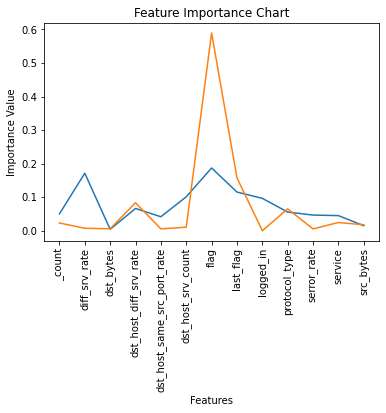

In [ ]:
sns.lineplot(y=df_Feature_Importance.RandomForestClassifier, x=df_Feature_Importance.index)
sns.lineplot(y=df_Feature_Importance.DecisionTreeClassifier, x=df_Feature_Importance.index)
plt.title('Feature Importance Chart')
plt.ylabel('Importance Value')
plt.xlabel('Features')
plt.xticks(rotation = 90)
plt.show();

In [ ]:
X_test = df_test_scaled[imp_cols]
Y_test = df_test[Target].copy().values.ravel()

Y_test.shape ,  X_test.shape

((22544,), (22544, 13))

In [ ]:
for row_index, alg in enumerate(MLA):

    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    
    MLA_compare.loc[row_index, 'MLA Test Accuracy']= alg.score(X_test, Y_test)

#     print(MLA_compare[row_index])


In [ ]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Validation Accuracy Mean,MLA Validation Accuracy 3*STD,MLA Time,Difference,MLA Test Accuracy
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.999743,0.998898,0.000486521,4.98535,-0.0844646,0.790898
1,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.999784,0.9979,0.000690311,0.232574,-0.188401,0.794313
